# Objective:- We want to predict which candidate is eligible (Loan Status)

In [1]:
#import the important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the train data
df_train=pd.read_csv("train.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

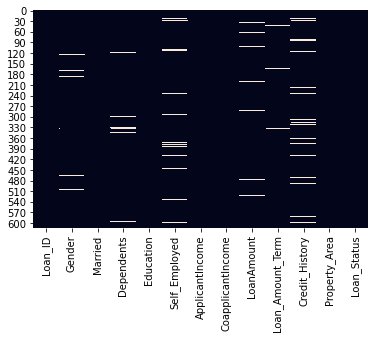

In [4]:
#Check the null values distribution
sns.heatmap(df_train.isnull(),cbar=False)

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Check the stastical descricption of data
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001116,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# Visualization of attributes with output variable 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

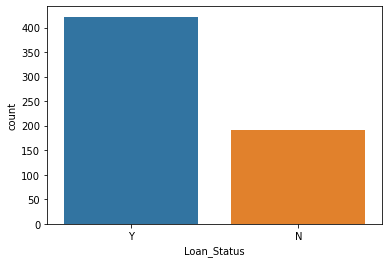

In [8]:
sns.countplot(x="Loan_Status",data=df_train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

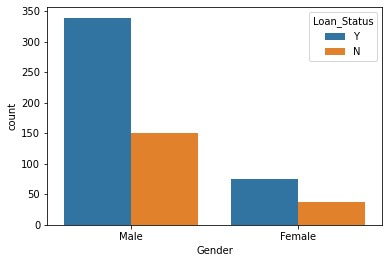

In [7]:
sns.countplot(x="Gender",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Married', ylabel='count'>

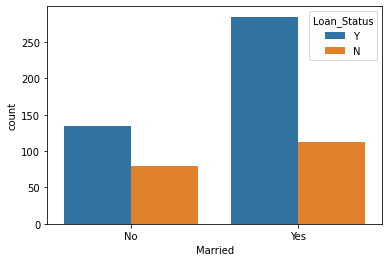

In [9]:
sns.countplot(x="Married",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

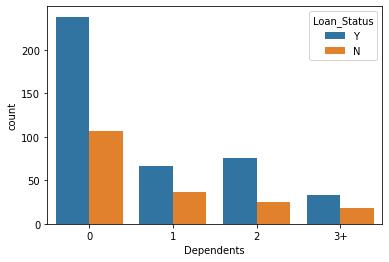

In [10]:
sns.countplot(x="Dependents",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Education', ylabel='count'>

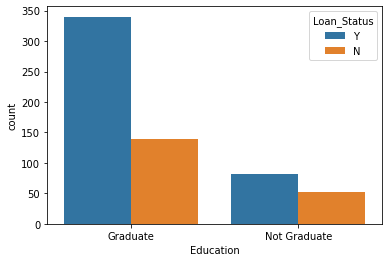

In [11]:
sns.countplot(x="Education",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

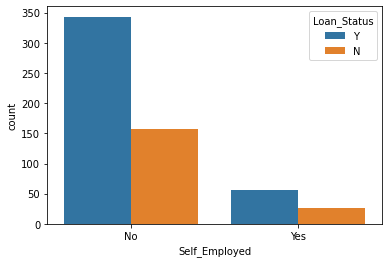

In [12]:
sns.countplot(x="Self_Employed",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

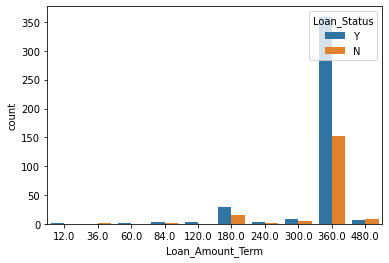

In [13]:
sns.countplot(x="Loan_Amount_Term",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

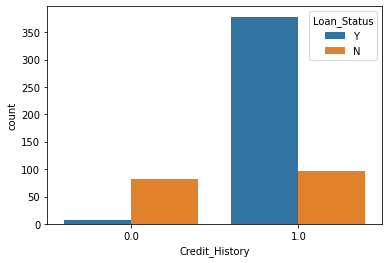

In [14]:
sns.countplot(x="Credit_History",data=df_train,hue="Loan_Status")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

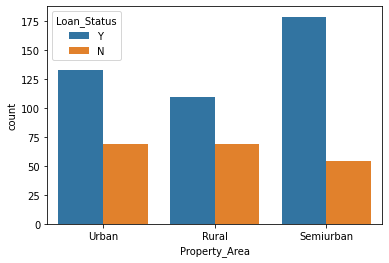

In [15]:
sns.countplot(x="Property_Area",data=df_train,hue="Loan_Status")

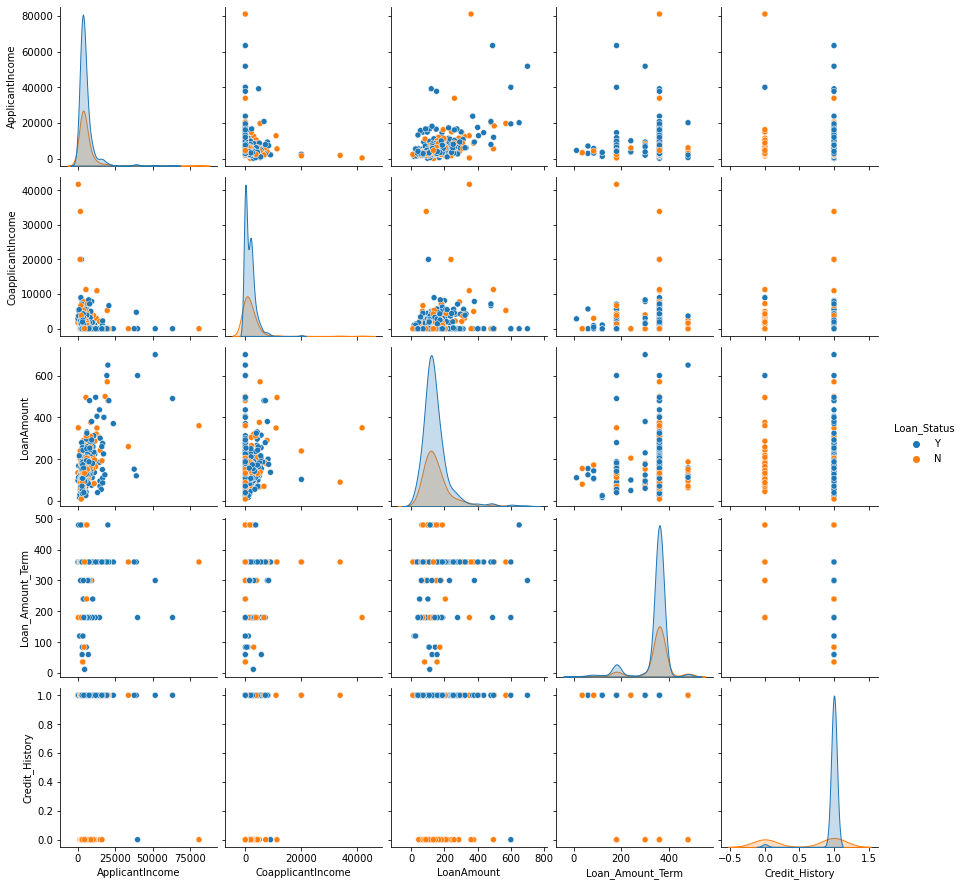

In [16]:
sns.pairplot(df_train,hue="Loan_Status")

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

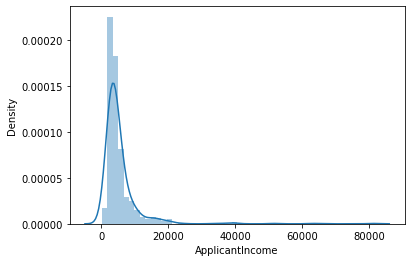

In [19]:
#It is not following normal distribution
sns.distplot(df_train["ApplicantIncome"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

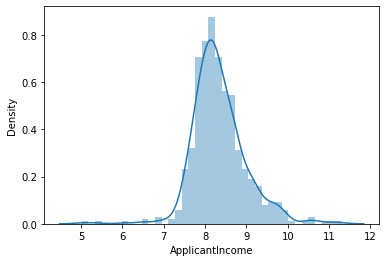

In [20]:
#We apply log transform after that it is similar to normal bell curve
sns.distplot(np.log(df_train["ApplicantIncome"]))

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

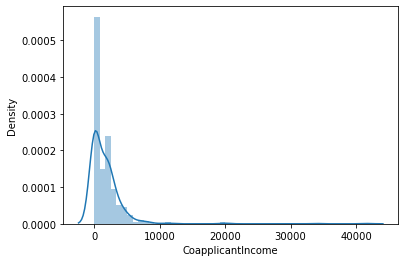

In [21]:
#It is not following normal disrtibution
sns.distplot(df_train["CoapplicantIncome"])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

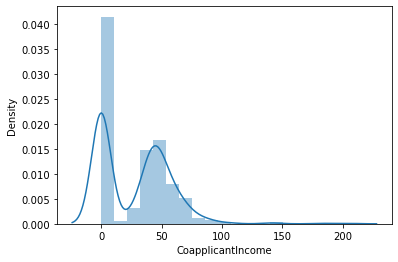

In [22]:
#we apply square root transformation after that all record follow normal distribution except Zero
sns.distplot(np.sqrt(df_train["CoapplicantIncome"]))

# Feature engineering 

In [23]:
#Fill the null values 
MD=df_train['Gender'].mode()
df_train['Gender'].fillna(value=MD[0],inplace=True)

In [24]:
MD=df_train['Married'].mode()
df_train['Married'].fillna(value=MD[0],inplace=True)

In [25]:
MD=df_train['Dependents'].mode()
df_train['Dependents'].fillna(value=MD[0],inplace=True)

In [26]:
MD=df_train['Self_Employed'].mode()
df_train['Self_Employed'].fillna(value=MD[0],inplace=True)

MD=df_train['Credit_History'].mode()
df_train['Credit_History'].fillna(value=MD[0],inplace=True)

In [27]:
MD=df_train['Loan_Amount_Term'].mode()
df_train['Loan_Amount_Term'].fillna(value=MD[0],inplace=True)

In [28]:
MD=df_train['LoanAmount'].mean()
df_train['LoanAmount'].fillna(value=MD,inplace=True)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
#Find the outliers 
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [31]:
outlier_treatment(df_train["ApplicantIncome"])

(-1498.75, 10171.25)

In [32]:
df_train[(df_train["ApplicantIncome"] < -1498.75) | (df_train["ApplicantIncome"] > 10171.25)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.000000,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.000000,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.000000,360.0,1.0,Urban,Y
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,146.412162,360.0,1.0,Urban,Y
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.000000,360.0,1.0,Urban,Y
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.000000,180.0,1.0,Rural,Y
119,LP001422,Female,No,0,Graduate,No,10408,0.0,259.000000,360.0,1.0,Urban,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.000000,360.0,1.0,Rural,Y
128,LP001451,Male,Yes,1,Graduate,Yes,10513,3850.0,160.000000,180.0,0.0,Urban,N


In [33]:
outlier_treatment(df_train["CoapplicantIncome"])

(-3445.875, 5743.125)

In [34]:
df_train[(df_train["CoapplicantIncome"] < -3445.875) | (df_train["CoapplicantIncome"] > 5743.125)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [35]:
outlier_treatment(df_train["LoanAmount"])

(3.5, 261.5)

In [36]:
df_train[(df_train["LoanAmount"] < 3.5) | (df_train["LoanAmount"] > 261.5)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
34,LP001100,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,LP001186,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
67,LP001233,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,1.0,Urban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

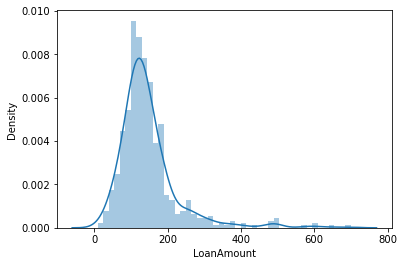

In [37]:
#It is not following perfect well curve 
sns.distplot((df_train["LoanAmount"]))

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

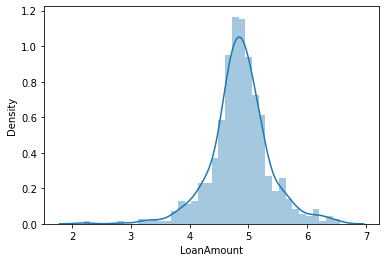

In [38]:
#We apply log transform on the dataset 
sns.distplot(np.log(df_train["LoanAmount"]))

In [40]:
df_train.select_dtypes(include=['object']).columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [41]:
#Data pre processing or convert the categorical data to numerical 
from sklearn import preprocessing
import warnings
warnings="ignore"

In [42]:
le = preprocessing.LabelEncoder()
df_train['Gender']=le.fit_transform(df_train.Gender.values)
df_train['Married']=le.fit_transform(df_train.Married.values)
df_train['Dependents']=le.fit_transform(df_train.Dependents.values)
df_train['Education']=le.fit_transform(df_train.Education.values)
df_train['Self_Employed']=le.fit_transform(df_train.Self_Employed.values)
df_train['Property_Area']=le.fit_transform(df_train.Property_Area.values)
df_train['Loan_Status']=le.fit_transform(df_train.Loan_Status.values)

In [43]:
#We apply some transformation on the numerical attributes for make the normally distributed  
df_train["ApplicantIncome"]=np.log(df_train["ApplicantIncome"])
df_train["CoapplicantIncome"]=np.sqrt(df_train["CoapplicantIncome"])
df_train["LoanAmount"]=np.log(df_train["LoanAmount"])


In [44]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,38.832976,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,48.559242,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,7.972466,0.000000,4.262680,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,8.320205,0.000000,3.688879,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8.996157,15.491933,5.533389,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,8.933664,0.000000,5.231109,360.0,1.0,2,1


# Model Building 

In [45]:
#separate the features & output variable 
X=df_train.iloc[:,1:12]
Y=df_train.iloc[:,12]

In [46]:
#Using feature selection method drop the unimportant feature 
X=X.drop(["Loan_Amount_Term","Gender","Self_Employed","Married","Dependents"],axis=1)

In [47]:
X.columns

Index(['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [48]:
feat_labels=['Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History', 'Property_Area']

In [49]:
#We know that in the dataset output have imbalance variable so increase the minorrity variable (0) we will apply over sampling 
import imblearn
from imblearn.over_sampling import RandomOverSampler
# TO CORRECT UNBALANCING
os =  RandomOverSampler(sampling_strategy='minority',random_state=42)
X_over, Y_over = os.fit_resample(X, Y)
X_over.shape,Y_over.shape
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_over,Y_over,test_size=0.25,random_state=0)

In [50]:
#Apply Random forest classifier we will build the model 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=85,random_state=0)
clf.fit(x_train,y_train)
result = clf.score(x_test, y_test)
print(result)

0.9004739336492891


In [51]:
#For feature selection we will do reverse engineering 
from sklearn.feature_selection import SelectFromModel
# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Education', 0.019157038420679156)
('ApplicantIncome', 0.26663429181936116)
('CoapplicantIncome', 0.1476415844547318)
('LoanAmount', 0.23452195109967086)
('Credit_History', 0.27360062781314526)
('Property_Area', 0.05844450639241177)


In [52]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
sfm = SelectFromModel(clf, threshold=0.05)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=85,
                                                 random_state=0),
                threshold=0.05)

In [53]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

ApplicantIncome
CoapplicantIncome
LoanAmount
Credit_History
Property_Area


In [54]:
y_pred = clf.predict(x_test)


In [55]:
#Check the confusion metrics & test stastics 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[94 14]
 [ 7 96]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       108
           1       0.87      0.93      0.90       103

    accuracy                           0.90       211
   macro avg       0.90      0.90      0.90       211
weighted avg       0.90      0.90      0.90       211



In [56]:
#Check the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [57]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.901


Text(0, 0.5, 'True Positive Rate')

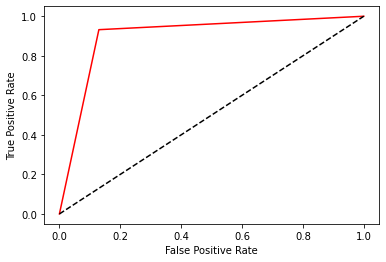

In [58]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [59]:
#To find the better accuracy we will make the model using XGBOOST
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(n_estimators=30,max_depth=10,random_state=0)
xgb1.fit(x_train,y_train)


y_pred=xgb1.predict(x_test)
xgb1.score(x_test,y_test)

[22:01:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8388625592417062

# Conclusion:-We have tried all possible stuff in term find the better accuracy we got the 90% accuracy with Random forest

**Now we will apply this model to predict the test dataset**

In [188]:
#Load the dataset
df_test=pd.read_csv("test.csv")

In [189]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [190]:
df_test.dropna(inplace=True)
df_test.reset_index(inplace=True)
df_test.drop("index",axis=1,inplace=True)

In [191]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 27.2+ KB


In [192]:
#Preprocess the attributes 
df_test['Gender']=le.fit_transform(df_test.Gender.values)
df_test['Married']=le.fit_transform(df_test.Married.values)
df_test['Dependents']=le.fit_transform(df_test.Dependents.values)
df_test['Education']=le.fit_transform(df_test.Education.values)
df_test['Self_Employed']=le.fit_transform(df_test.Self_Employed.values)
df_test['Property_Area']=le.fit_transform(df_test.Property_Area.values)

In [193]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
4,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


In [194]:
#Drop the unwanted features 
X_test=df_test.drop(["Loan_ID","Loan_Amount_Term","Gender","Self_Employed","Married","Dependents"],axis=1)

In [195]:
#Load the dataset again
df_test=pd.read_csv("test.csv")

In [196]:
#drop the null values agian 
df_test.dropna(inplace=True)
df_test.reset_index(inplace=True)
df_test.drop("index",axis=1,inplace=True)


In [197]:
#Predict the Loan status 
df_test["Loan_Status"]=clf.predict(X_test)

In [198]:
#Final new dataset
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
4,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban,0
285,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,0
286,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,0
287,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,0


# Dump the model in pickle file for deployment 

In [200]:
from pickle import dump
from pickle import load  

In [201]:
dump(clf,open('loan_model.pkl', 'wb')) 

In [202]:
loaded_model=load(open('loan_model.pkl' ,'rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9004739336492891
